In [1]:
from sklearn.datasets import load_digits
import numpy as np

In [2]:
digits=load_digits()

In [3]:
X = digits.data
y = digits.target

In [4]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
X.shape

(1797, 64)

In [7]:
from sklearn.decomposition import PCA
digits_pca=PCA(n_components = 0.98).fit(digits.data)
digits_redu=digits_pca.transform(digits.data)
digits_inv=digits_pca.inverse_transform(digits_redu)
rmse= np.sqrt(np.sum((digits_inv-digits.data)**2)/len(digits.data))
print(rmse)

4.703334384261629


In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(2)
Xproj = pca.fit_transform(X)
Xproj.shape

(1797, 2)

C:\Users\visha\AppData\Local\Temp\ipykernel_9648\2927123678.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  palette=plt.cm.get_cmap('nipy_spectral',10))


<Axes: >

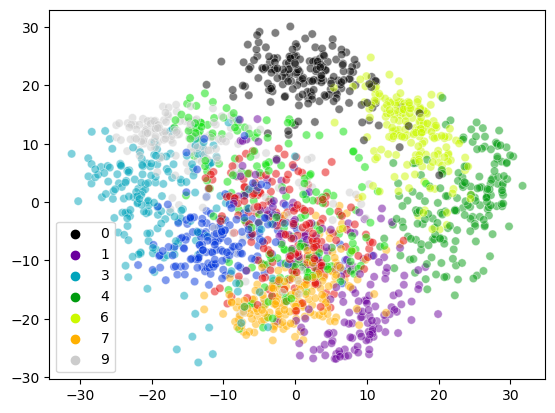

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x = Xproj[:, 0], y=Xproj[:,1], hue=y, alpha=0.5,
               palette=plt.cm.get_cmap('nipy_spectral',10))

# Effect of PCA

In [11]:
X_ = pca.inverse_transform(Xproj)

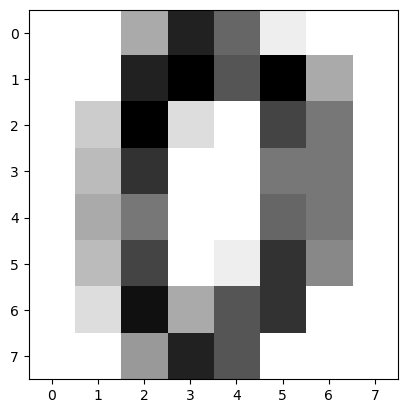

In [12]:
plt.imshow(X[0].reshape((8,8)),
          cmap=plt.cm.binary)

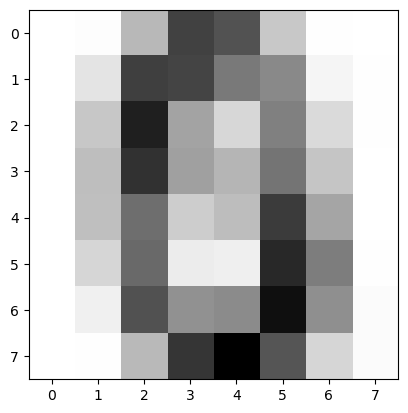

In [13]:
plt.imshow(X_[0].reshape((8,8)),
          cmap=plt.cm.binary)

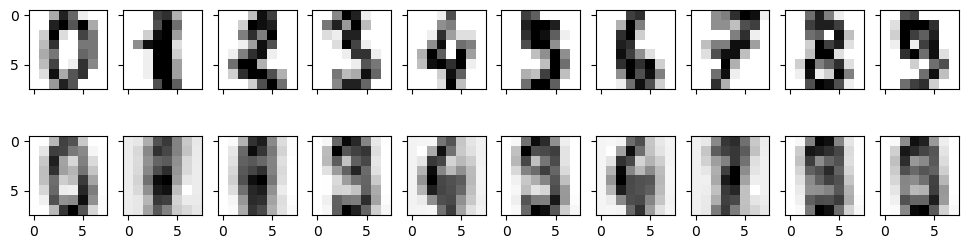

In [14]:
fig = plt.figure(figsize=(12,3))
axes = fig.subplots(2,10, sharex=True, sharey=True)
for i in range(10):
    axes[0,i].imshow(X[i].reshape((8,8)), cmap=plt.cm.binary)
    
for i in range(10):
    axes[1,i].imshow(X_[i].reshape((8,8)), cmap=plt.cm.binary)

## Error in Reduction

In [15]:
# RMSE
import numpy as np
np.sqrt(np.sum((X_ - X)**2)/len(X))

29.3077597378034

In [16]:
errors = []
for n_components in range(2,65):
    pca = PCA(n_components)
    Xproj = pca.fit_transform(X)
    X_ = pca.inverse_transform(Xproj)
    errors.append(np.sqrt(np.sum((X_ - X)**2)/len(X)))
    

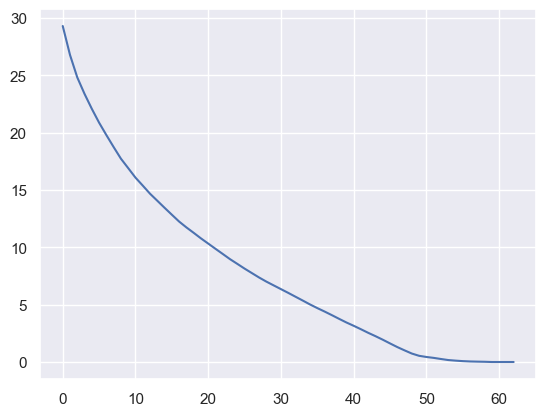

In [17]:
sns.set()
plt.plot(errors)

## Explained Variance

Text(0, 0.5, 'cumulative explained variance')

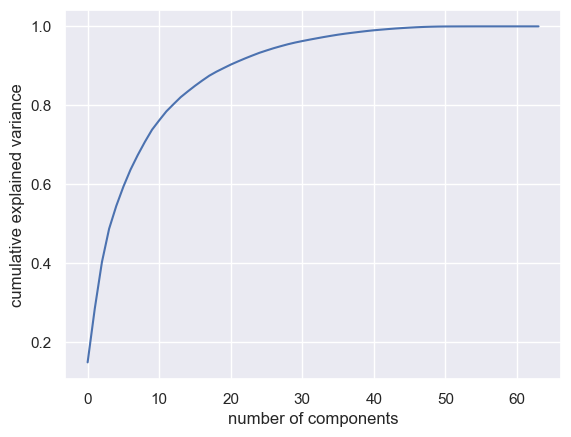

In [18]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [19]:
pca = PCA(0.9)
Xproj = pca.fit_transform(X)
Xproj.shape

(1797, 21)

In [20]:
X_ = pca.inverse_transform(Xproj)

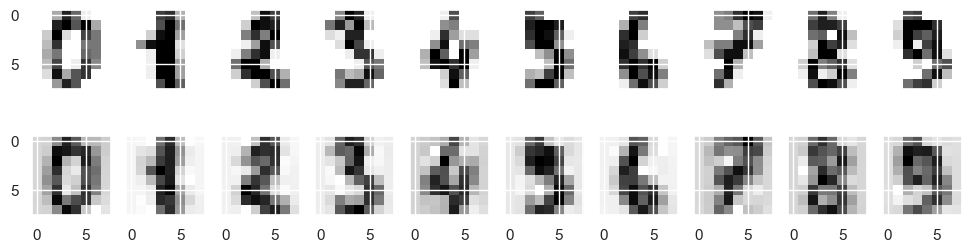

In [21]:
fig = plt.figure(figsize=(12,3))
axes = fig.subplots(2,10, sharex=True, sharey=True)
for i in range(10):
    axes[0,i].imshow(X[i].reshape((8,8)), cmap=plt.cm.binary)
    
for i in range(10):
    axes[1,i].imshow(X_[i].reshape((8,8)), cmap=plt.cm.binary)